#### Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
from scipy.stats import norm 
from tabulate import tabulate

from iexfinance.stocks import get_historical_data
from iexfinance.stocks import Stock
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

#### Importing dataset

In [2]:
market_risk = pd.read_csv('Market+Risk+Dataset.csv')
market_risk.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


#### Fixing messy column names (containing spaces) for ease of use

In [3]:
market_risk.columns = market_risk.columns.str.replace(' ', '_').str.replace('&', 'and')
market_risk.head()

,Date,Infosys,Indian_Hotel,Mahindra_and_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


#### First, let us check the number of rows (observations) and the number of columns (variables)

In [4]:
print('The number of rows (observations) is',market_risk.shape[0],'\n''The number of columns (variables) is',market_risk.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


#### Checking data types of all columns

In [5]:
market_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   314 non-null    object
 1   Infosys                314 non-null    int64 
 2   Indian_Hotel           314 non-null    int64 
 3   Mahindra_and_Mahindra  314 non-null    int64 
 4   Axis_Bank              314 non-null    int64 
 5   SAIL                   314 non-null    int64 
 6   Shree_Cement           314 non-null    int64 
 7   Sun_Pharma             314 non-null    int64 
 8   Jindal_Steel           314 non-null    int64 
 9   Idea_Vodafone          314 non-null    int64 
 10  Jet_Airways            314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


#### Now, let us check the basic measures of descriptive statistics for the continuous variables

In [6]:
market_risk.describe()

,Infosys,Indian_Hotel,Mahindra_and_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


#### Lets us plot & see price trend over time for different companies

Changing format of 'Date' variable from object to Datetime

In [7]:
market_risk['date'] = [pd.to_datetime(d) for d in market_risk['Date']]

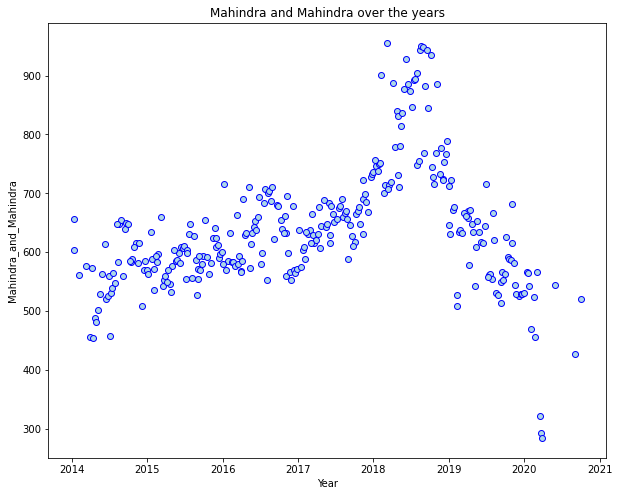

In [8]:
plt.figure(figsize = (10, 8))
plt.scatter(market_risk['date'], market_risk['Mahindra_and_Mahindra'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Mahindra_and_Mahindra')
plt.title('Mahindra and Mahindra over the years')
plt.show()

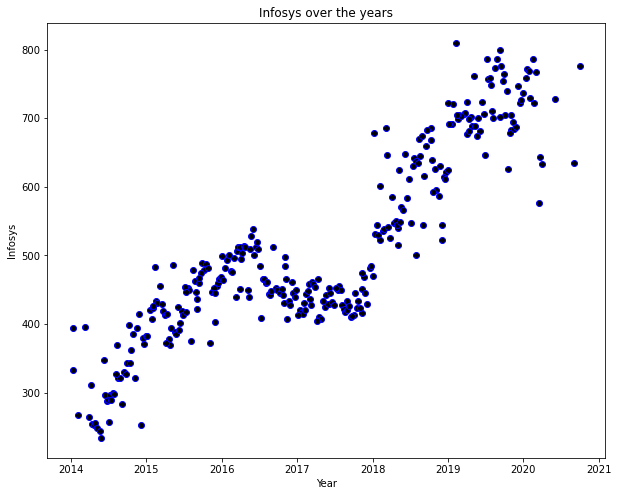

In [9]:
plt.figure(figsize = (10, 8))
plt.scatter(market_risk['date'], market_risk['Infosys'], edgecolors='b', color = 'black')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys over the years')
plt.show()

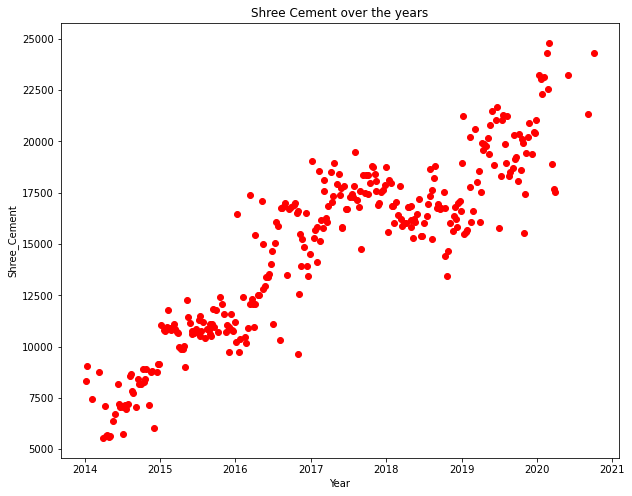

In [10]:
plt.figure(figsize = (10, 8))
plt.scatter(market_risk['date'], market_risk['Shree_Cement'], edgecolors='r', color = 'red')
plt.xlabel('Year')
plt.ylabel('Shree_Cement')
plt.title('Shree Cement over the years')
plt.show()

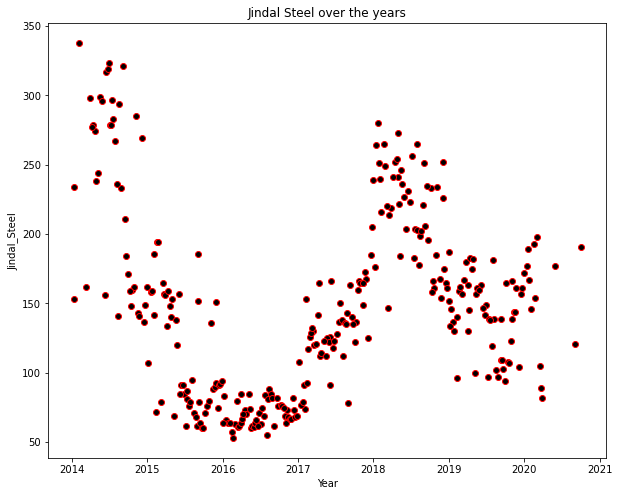

In [11]:
plt.figure(figsize = (10, 8))
plt.scatter(market_risk['date'], market_risk['Jindal_Steel'], edgecolors='r', color = 'black')
plt.xlabel('Year')
plt.ylabel('Jindal_Steel')
plt.title('Jindal Steel over the years')
plt.show()

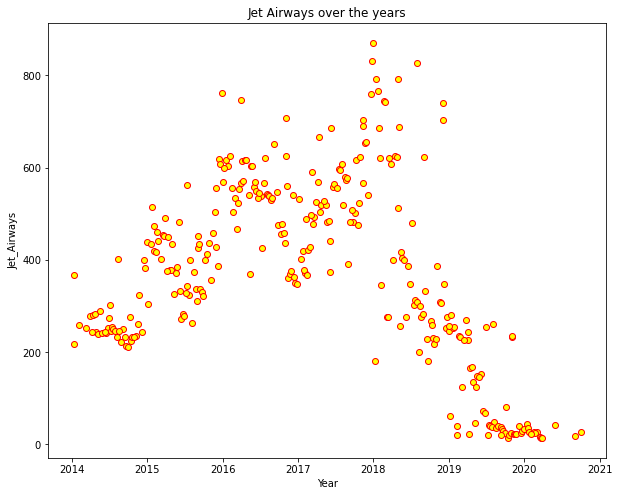

In [12]:
plt.figure(figsize = (10, 8))
plt.scatter(market_risk['date'], market_risk['Jet_Airways'], edgecolors='r', color = 'yellow')
plt.xlabel('Year')
plt.ylabel('Jet_Airways')
plt.title('Jet Airways over the years')
plt.show()

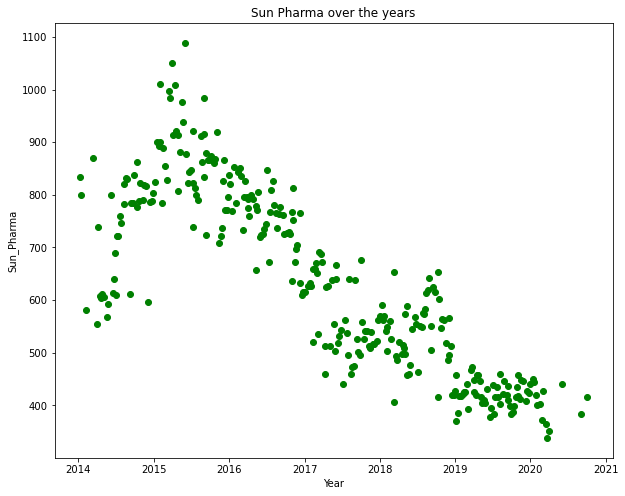

In [13]:
plt.figure(figsize = (10, 8))
plt.scatter(market_risk['date'], market_risk['Sun_Pharma'], edgecolors='g', color = 'green')
plt.xlabel('Year')
plt.ylabel('Sun_Pharma')
plt.title('Sun Pharma over the years')
plt.show()

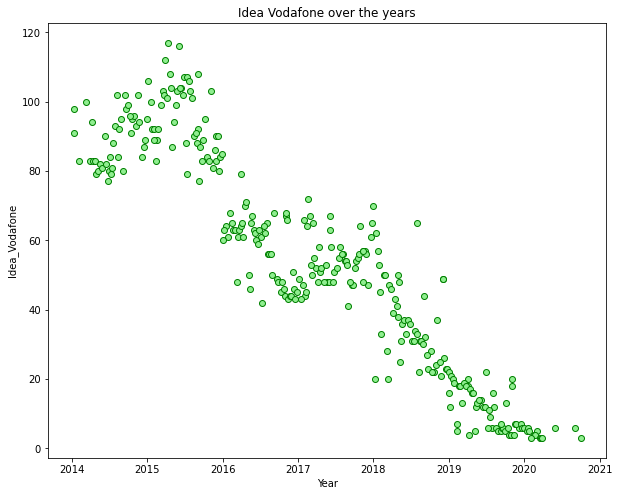

In [14]:
plt.figure(figsize = (10, 8))
plt.scatter(market_risk['date'], market_risk['Idea_Vodafone'], edgecolors='g', color = 'lightgreen')
plt.xlabel('Year')
plt.ylabel('Idea_Vodafone')
plt.title('Idea Vodafone over the years')
plt.show()

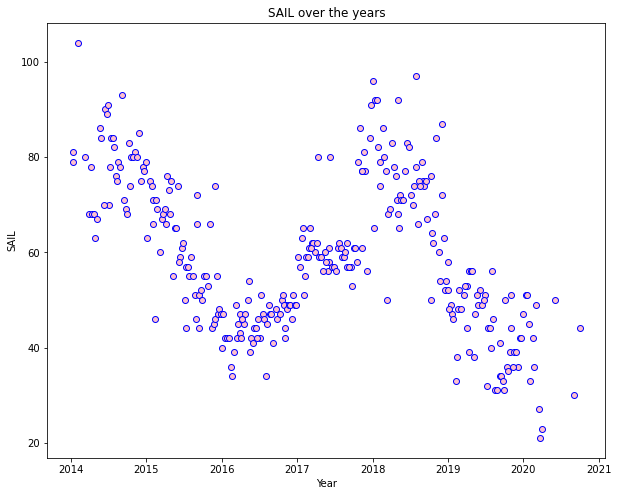

In [15]:
plt.figure(figsize = (10, 8))
plt.scatter(market_risk['date'], market_risk['SAIL'], edgecolors='b', color = 'pink')
plt.xlabel('Year')
plt.ylabel('SAIL')
plt.title('SAIL over the years')
plt.show()

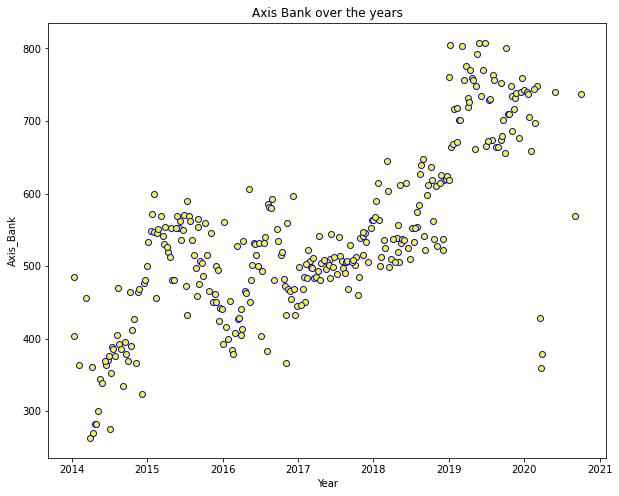

In [16]:
plt.figure(figsize = (10, 8))
plt.scatter(market_risk['date'], market_risk['Axis_Bank'], edgecolors='b', color = 'yellow')
plt.xlabel('Year')
plt.ylabel('Axis_Bank')
plt.title('Axis Bank over the years')
plt.show()

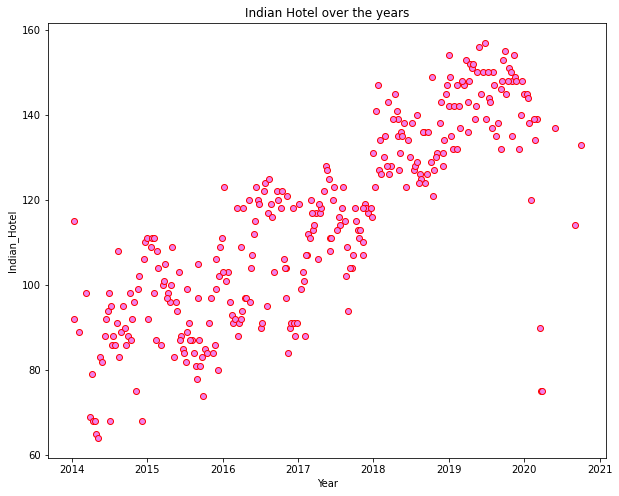

In [17]:
plt.figure(figsize = (10, 8))
plt.scatter(market_risk['date'], market_risk['Indian_Hotel'], edgecolors='r', color = 'violet')
plt.xlabel('Year')
plt.ylabel('Indian_Hotel')
plt.title('Indian Hotel over the years')
plt.show()

### Analyzing returns

Steps for calculating returns from prices:

- Take logarithms

- Take differences

In [18]:
market_returns = np.log(market_risk.drop(['Date','date'],axis=1)).diff(axis = 0, periods = 1) 

#### Checking the rows & columns of dataset

In [19]:
market_returns.shape

(314, 10)

#### Checking top 5 rows

In [20]:
market_returns.head()

,Infosys,Indian_Hotel,Mahindra_and_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


#### We now look at Means & Standard Deviations of these returns

Stock Means: Average returns that the stock is making on a week to week basis

Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the stock's average return, the more volatile the stock

#### Calculating stock means

In [21]:
market_means = market_returns.mean(axis = 0)
market_means

Infosys                  0.002794
Indian_Hotel             0.000266
Mahindra_and_Mahindra   -0.001506
Axis_Bank                0.001167
SAIL                    -0.003463
Shree_Cement             0.003681
Sun_Pharma              -0.001455
Jindal_Steel            -0.004123
Idea_Vodafone           -0.010608
Jet_Airways             -0.009548
dtype: float64

#### Calculating stock standard deviation

In [22]:
market_sd = market_returns.std(axis = 0)
market_sd

Infosys                  0.035070
Indian_Hotel             0.047131
Mahindra_and_Mahindra    0.040169
Axis_Bank                0.045828
SAIL                     0.062188
Shree_Cement             0.039917
Sun_Pharma               0.045033
Jindal_Steel             0.075108
Idea_Vodafone            0.104315
Jet_Airways              0.097972
dtype: float64

In [23]:
df = pd.DataFrame({'Average':market_means, 'Volatility': market_sd})
df

,Average,Volatility
Infosys,0.002794,0.035070
Indian_Hotel,0.000266,0.047131
Mahindra_and_Mahindra,-0.001506,0.040169
Axis_Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree_Cement,0.003681,0.039917
Sun_Pharma,-0.001455,0.045033
Jindal_Steel,-0.004123,0.075108
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972


#### Let us plot & see what they say about market price

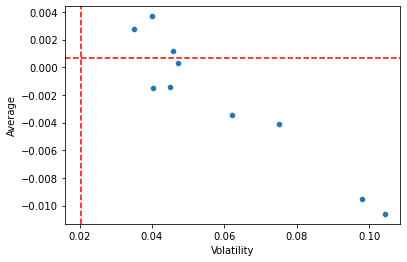

In [24]:
plot = sns.scatterplot(df['Volatility'], df['Average'])
plot.axvline(x=0.020257,linestyle='--', color = "red")
plot.axhline(y=0.000683,linestyle='--', color = "red")
plt.show()

#### Generating technical indicators of the stock

Implementing moving average

In [25]:
market_risk["average10"] = market_risk['Jet_Airways'].rolling(window=10).mean()
market_risk["average20"] = market_risk['Jet_Airways'].rolling(window=20).mean()
market_risk["average10"].head(20)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9     265.8
10    263.0
11    256.9
12    254.2
13    253.4
14    253.7
15    255.2
16    255.9
17    251.7
18    252.0
19    249.7
Name: average10, dtype: float64

In [26]:
market_risk["std10"] = market_risk['Jet_Airways'].rolling(window=10).std()
market_risk["std20"] = market_risk['Jet_Airways'].rolling(window=20).std()

#### Computing RSI Indicator

Relative Strength Index (RSI) - The Relative Strength Index (RSI) calculates a ratio of the recent upward price movements to the absolute price movement. The RSI ranges from 0 to 100. The RSI is interpreted as an overbought/oversold indicator when the value is over 70/below 30.

In [27]:
def RSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions of diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [28]:
market_risk['rsi5'] = RSI(market_risk['Jet_Airways'], 5)
market_risk['rsi14'] = RSI(market_risk['Jet_Airways'], 14)

#### Calculating MACD (Moving Average Convergence Divergence)

MACD is the difference between two Exponential Moving Average

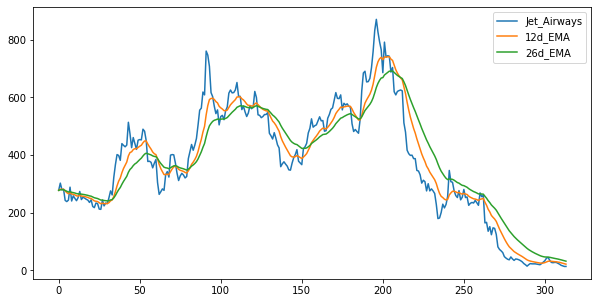

In [29]:
market_risk['12d_EMA'] = market_risk['Jet_Airways'].ewm(span=12, adjust=False).mean()
market_risk['26d_EMA'] = market_risk['Jet_Airways'].ewm(span=26, adjust=False).mean()

market_risk[['Jet_Airways','12d_EMA','26d_EMA']].plot(figsize=(10,5))
plt.show()

#### Calculate the difference between 26 day & 12 day Moving averages

In [30]:
market_risk['macd'] = market_risk['12d_EMA'] - market_risk['26d_EMA'] 

#### Calculate Signal

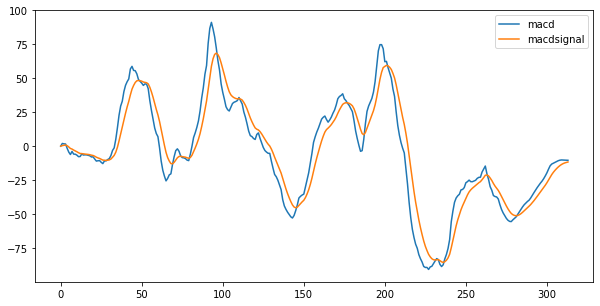

In [31]:
market_risk['macdsignal'] = market_risk.macd.ewm(span=9, adjust=False).mean()

market_risk[['macd','macdsignal']].plot(figsize=(10,5))
plt.show()

#### Compute the Bollinger Bands using the 20-day Moving average

In [32]:
MA = market_risk['Jet_Airways'].rolling(window=20).mean()
SD = market_risk['Jet_Airways'].rolling(window=20).std()
market_risk['UpperBB'] = MA + (2 * SD) 
market_risk['LowerBB'] = MA - (2 * SD)

#### Steps: We clean the output and generated a column called direction basis the following:
- If Price > upper Bollinger band, and MACD value > MACD signal -> Buy signal (1)
- If Price < lower Bollinger band, and MACD value < MACD signal -> Sell signal (-1)
- Else, Out of the market -> Signal OOM(0)

In [33]:
# Define Signal
market_risk['Direction'] = np.where((market_risk['macd'] > market_risk['macdsignal']) & 
                                      (market_risk['Jet_Airways'] > market_risk['UpperBB']), 1, 
                                     np.where((market_risk['macd'] < market_risk['macdsignal']) & 
                                               (market_risk['Jet_Airways'] < market_risk['LowerBB']),-1,0))



market_risk['Direction']

0      0
1      0
2      0
3      0
4      0
      ..
309    0
310    0
311    0
312    0
313    0
Name: Direction, Length: 314, dtype: int32

#### Checking distribution of response variable

In [34]:
market_risk['Direction'].value_counts()

 0    280
 1     20
-1     14
Name: Direction, dtype: int64

#### Create the plot

<AxesSubplot:>

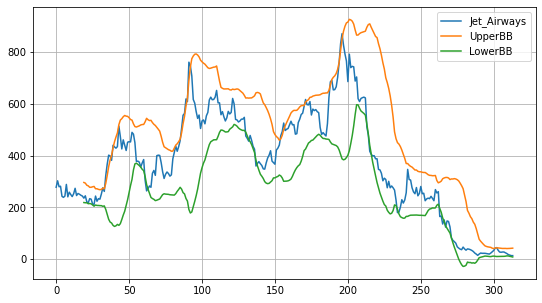

In [35]:
pd.concat([market_risk.Jet_Airways,market_risk.UpperBB,market_risk.LowerBB],axis=1).plot(figsize=(9,5),grid=True)

In [36]:
market_final = market_risk[['Jet_Airways','average10', 'average20', 'std10', 'std20', 'rsi5', 'rsi14', 'Direction']]

#### Checking the missing values

In [37]:
market_risk.isnull().sum()

Date                      0
Infosys                   0
Indian_Hotel              0
Mahindra_and_Mahindra     0
Axis_Bank                 0
SAIL                      0
Shree_Cement              0
Sun_Pharma                0
Jindal_Steel              0
Idea_Vodafone             0
Jet_Airways               0
date                      0
average10                 9
average20                19
std10                     9
std20                    19
rsi5                      5
rsi14                    14
12d_EMA                   0
26d_EMA                   0
macd                      0
macdsignal                0
UpperBB                  19
LowerBB                  19
Direction                 0
dtype: int64

In [38]:
market_risk.dropna(inplace=True)

In [39]:
market_risk.isnull().sum()

Date                     0
Infosys                  0
Indian_Hotel             0
Mahindra_and_Mahindra    0
Axis_Bank                0
SAIL                     0
Shree_Cement             0
Sun_Pharma               0
Jindal_Steel             0
Idea_Vodafone            0
Jet_Airways              0
date                     0
average10                0
average20                0
std10                    0
std20                    0
rsi5                     0
rsi14                    0
12d_EMA                  0
26d_EMA                  0
macd                     0
macdsignal               0
UpperBB                  0
LowerBB                  0
Direction                0
dtype: int64

#### Creating training & test datasets for model building

In [40]:
X = market_final.drop(['Direction'], axis=1)
y = market_final['Direction']


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=142,stratify=market_final['Direction'])

In [42]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (219, 7)
Number of rows and columns of the training set for the dependent variable: (219,)
Number of rows and columns of the test set for the independent variables: (95, 7)
Number of rows and columns of the test set for the dependent variable: (95,)


In [43]:
X_train.head()

,Jet_Airways,average10,average20,std10,std20,rsi5,rsi14
131,467,531.5,549.85,37.280469,36.616469,17.259633,35.780682
106,626,556.3,595.80,38.221722,71.093415,72.880721,61.034990
214,480,610.7,695.10,68.525826,105.496271,10.310990,32.027060
139,377,430.4,493.20,45.551436,74.723068,23.004155,30.109794
149,373,376.4,403.40,22.460830,44.600448,40.134259,37.921845


In [44]:
from numpy import NaN

In [45]:

from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=NaN, strategy="mean")
cols=X_train.columns
X_train = pd.DataFrame(rep_0.fit_transform(X_train))
X_test = pd.DataFrame(rep_0.fit_transform(X_test))

X_train.columns = cols
X_test.columns = cols

X_train.head()

,Jet_Airways,average10,average20,std10,std20,rsi5,rsi14
0,467.0,531.5,549.85,37.280469,36.616469,17.259633,35.780682
1,626.0,556.3,595.80,38.221722,71.093415,72.880721,61.034990
2,480.0,610.7,695.10,68.525826,105.496271,10.310990,32.027060
3,377.0,430.4,493.20,45.551436,74.723068,23.004155,30.109794
4,373.0,376.4,403.40,22.460830,44.600448,40.134259,37.921845


## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
lr=model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.0s finished


In [47]:
#Predicting on Training and Test dataset
ytrain_predict = lr.predict(X_train)
ytest_predict = lr.predict(X_test)

In [48]:
ytest_predict_prob=lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1,2
0,4.791030e-93,1.000000,2.559023e-78
1,1.650642e-15,1.000000,1.083814e-194
2,4.146017e-129,1.000000,4.585223e-95
3,5.586030e-19,1.000000,1.476242e-56
4,1.842805e-06,0.999998,3.524563e-137


In [49]:
# Accuracy - Training Data and Test Data
lr_train_acc=lr.score(X_train, y_train)
lr_train_acc

1.0

In [50]:
lr_test_acc=lr.score(X_test, y_test)
lr_test_acc

0.9263157894736842

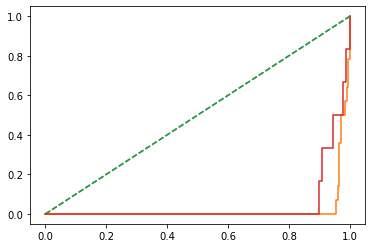

In [51]:
#AUC and ROC for the training data
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve 
lr_train_fpr, lr_train_tpr, train_thresholds = roc_curve(y_train,  probs , pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr);


#AUC and ROC for the test data
# predict probabilities
probs = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
lr_test_fpr, lr_test_tpr, test_thresholds = roc_curve(y_test, probs, pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr);

In [52]:
#Confusion Matrix for the training data
confusion_matrix(y_train, ytrain_predict)

array([[ 10,   0,   0],
       [  0, 195,   0],
       [  0,   0,  14]], dtype=int64)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        10
           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00        14

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219



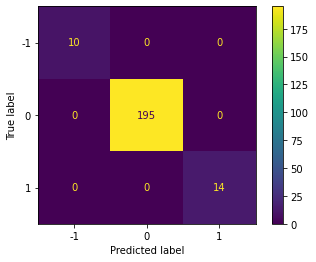

In [53]:
plot_confusion_matrix(lr,X_train,y_train);
print(classification_report(y_train, ytrain_predict))

In [54]:
#Confusion Matrix for test data
confusion_matrix(y_test, ytest_predict)

array([[ 2,  2,  0],
       [ 2, 82,  1],
       [ 0,  2,  4]], dtype=int64)

              precision    recall  f1-score   support

          -1       0.50      0.50      0.50         4
           0       0.95      0.96      0.96        85
           1       0.80      0.67      0.73         6

    accuracy                           0.93        95
   macro avg       0.75      0.71      0.73        95
weighted avg       0.92      0.93      0.93        95



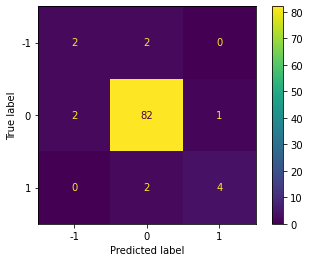

In [55]:
plot_confusion_matrix(lr,X_test,y_test);
print(classification_report(y_test, ytest_predict))

In [56]:
lr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
DF=pd.DataFrame(lr_metrics).transpose()
lr_train_precision=round(DF.loc["1"][0],2)
lr_train_recall=round(DF.loc["1"][1],2)
lr_train_f1=round(DF.loc["1"][2],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  1.0
lr_train_recall  1.0
lr_train_f1  1.0


In [57]:
lr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
DF=pd.DataFrame(lr_metrics).transpose()
lr_test_precision=round(DF.loc["1"][0],2)
lr_test_recall=round(DF.loc["1"][1],2)
lr_test_f1=round(DF.loc["1"][2],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.8
lr_test_recall  0.67
lr_test_f1  0.73


## Linear Discriminant Analysis

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [59]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
lda=clf.fit(X_train,y_train)

In [60]:
pred_class_train = lda.predict(X_train)
pred_class_test = lda.predict(X_test)

In [61]:
lda_train_acc= lda.score(X_train, y_train)
lda_train_acc

0.908675799086758

In [62]:
lda_test_acc= lda.score(X_test, y_test)
lda_test_acc

0.8842105263157894

In [63]:
#Confusion Matrix for the training data
confusion_matrix(y_train, pred_class_train)

array([[  6,   4,   0],
       [  3, 182,  10],
       [  0,   3,  11]], dtype=int64)

              precision    recall  f1-score   support

          -1       0.67      0.60      0.63        10
           0       0.96      0.93      0.95       195
           1       0.52      0.79      0.63        14

    accuracy                           0.91       219
   macro avg       0.72      0.77      0.74       219
weighted avg       0.92      0.91      0.91       219



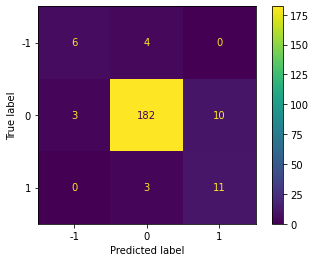

In [64]:
plot_confusion_matrix(lda,X_train,y_train);
print(classification_report(y_train, pred_class_train))

In [65]:
#Confusion Matrix for test data
confusion_matrix(y_test, pred_class_test)

array([[ 0,  4,  0],
       [ 1, 82,  2],
       [ 0,  4,  2]], dtype=int64)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           0       0.91      0.96      0.94        85
           1       0.50      0.33      0.40         6

    accuracy                           0.88        95
   macro avg       0.47      0.43      0.45        95
weighted avg       0.85      0.88      0.86        95



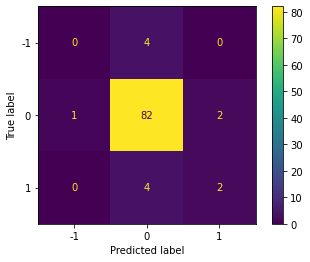

In [66]:
plot_confusion_matrix(lda,X_test,y_test);
print(classification_report(y_test, pred_class_test))

In [67]:
lda_metrics=classification_report(y_train,pred_class_train,output_dict=True)
DF=pd.DataFrame(lda_metrics).transpose()
lda_train_precision=round(DF.loc["1"][0],2)
lda_train_recall=round(DF.loc["1"][1],2)
lda_train_f1=round(DF.loc["1"][2],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.52
lda_train_recall  0.79
lda_train_f1  0.63


In [68]:
lda_metrics=classification_report(y_test,pred_class_test,output_dict=True)
DF=pd.DataFrame(lda_metrics).transpose()
lda_test_precision=round(DF.loc["1"][0],2)
lda_test_recall=round(DF.loc["1"][1],2)
lda_test_f1=round(DF.loc["1"][2],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.5
lda_test_recall  0.33
lda_test_f1  0.4


In [69]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

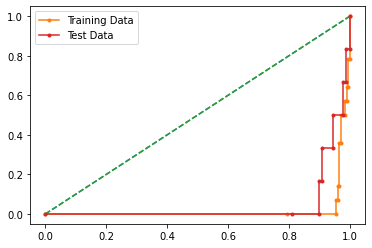

In [70]:
# ROC for the training data



#  calculate roc curve
lda_train_fpr, lda_train_tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1],pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.',label = 'Training Data')


# ROC for the test data

#  calculate roc curve
lda_test_fpr, lda_test_tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1],pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [72]:
model_2 = grid_search.fit(X_train, y_train)

In [73]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 15,
 'n_estimators': 50}

In [74]:
best_grid = grid_search.best_estimator_

In [75]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [76]:
rfcl_train_acc= best_grid.score(X_train, y_train)
rfcl_train_acc

0.9269406392694064

In [77]:
rfcl_test_acc= best_grid.score(X_test, y_test)
rfcl_test_acc

0.9157894736842105

In [78]:
#Confusion Matrix for the training data
confusion_matrix(y_train, pred_train_rf)

array([[  0,  10,   0],
       [  0, 192,   3],
       [  0,   3,  11]], dtype=int64)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        10
           0       0.94      0.98      0.96       195
           1       0.79      0.79      0.79        14

    accuracy                           0.93       219
   macro avg       0.57      0.59      0.58       219
weighted avg       0.88      0.93      0.91       219



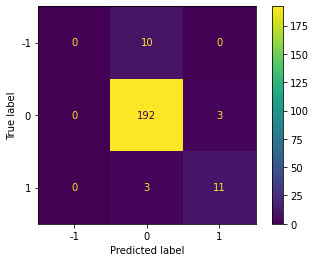

In [79]:
plot_confusion_matrix(best_grid,X_train,y_train);
print(classification_report(y_train, pred_train_rf))

In [80]:
#Confusion Matrix for test data
confusion_matrix(y_test, pred_test_rf)

array([[ 0,  4,  0],
       [ 0, 84,  1],
       [ 0,  3,  3]], dtype=int64)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           0       0.92      0.99      0.95        85
           1       0.75      0.50      0.60         6

    accuracy                           0.92        95
   macro avg       0.56      0.50      0.52        95
weighted avg       0.87      0.92      0.89        95



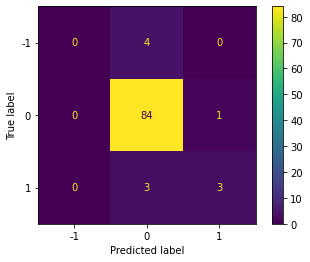

In [81]:
plot_confusion_matrix(best_grid,X_test,y_test);
print(classification_report(y_test, pred_test_rf))

In [82]:
rfcl_metrics=classification_report(y_train, pred_train_rf,output_dict=True)
DF=pd.DataFrame(rfcl_metrics).transpose()
rfcl_train_precision=round(DF.loc["1"][0],2)
rfcl_train_recall=round(DF.loc["1"][1],2)
rfcl_train_f1=round(DF.loc["1"][2],2)
print ('rfcl_train_precision ',rfcl_train_precision)
print ('rfcl_train_recall ',rfcl_train_recall)
print ('rfcl_train_f1 ',rfcl_train_f1)

rfcl_train_precision  0.79
rfcl_train_recall  0.79
rfcl_train_f1  0.79


In [83]:
rfcl_metrics=classification_report(y_test, pred_test_rf,output_dict=True)
DF=pd.DataFrame(rfcl_metrics).transpose()
rfcl_test_precision=round(DF.loc["1"][0],2)
rfcl_test_recall=round(DF.loc["1"][1],2)
rfcl_test_f1=round(DF.loc["1"][2],2)
print ('rfcl_test_precision ',rfcl_test_precision)
print ('rfcl_test_recall ',rfcl_test_recall)
print ('rfcl_test_f1 ',rfcl_test_f1)

rfcl_test_precision  0.75
rfcl_test_recall  0.5
rfcl_test_f1  0.6


In [84]:
# Training Data Probability Prediction
pred_train = best_grid.predict_proba(X_train)

# Test Data Probability Prediction
pred_test = best_grid.predict_proba(X_test)

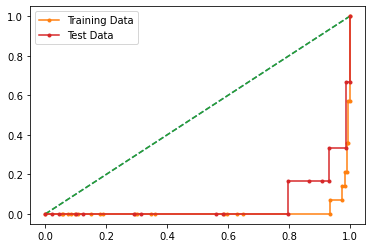

In [85]:
# ROC for the training data



#  calculate roc curve
rfcl_train_fpr, rfcl_train_tpr, rfcl_thresholds = metrics.roc_curve(y_train,pred_train[:,1],pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfcl_train_fpr,rfcl_train_tpr, marker='.',label = 'Training Data')


# ROC for the test data

#  calculate roc curve
rfcl_test_fpr, rfcl_test_tpr, rfcl_thresholds = metrics.roc_curve(y_test,pred_test[:,1],pos_label=1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfcl_test_fpr, rfcl_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### Comparing the performance metrix for  models

In [86]:
index=['Accuracy', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'lr Train':[lr_train_acc,lr_train_recall,lr_train_precision,lr_train_f1],
        'lr Test':[lr_test_acc,lr_test_recall,lr_test_precision,lr_test_f1],
       'lda Train':[lda_train_acc,lda_train_recall,lda_train_precision,lda_train_f1], 
        'lda Test':[lda_test_acc,lda_test_recall,lda_test_precision,lda_test_f1],
        'rfcl Train':[rfcl_train_acc,rfcl_train_recall,rfcl_train_precision,rfcl_train_f1], 
        'rfcl Test':[rfcl_test_acc,rfcl_test_recall,rfcl_test_precision,rfcl_test_f1], 
                    },index=index)
round(data,2)

,lr Train,lr Test,lda Train,lda Test,rfcl Train,rfcl Test
Accuracy,1.0,0.93,0.91,0.88,0.93,0.92
Recall,1.0,0.67,0.79,0.33,0.79,0.50
Precision,1.0,0.80,0.52,0.50,0.79,0.75
F1 Score,1.0,0.73,0.63,0.40,0.79,0.60


#### ROC Curve for both models on Train data

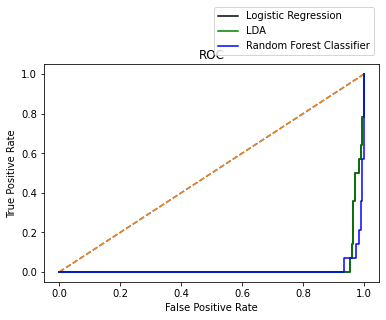

In [87]:
plt.plot([0, 1], [0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr,color='black',label="Logistic Regression")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.plot(rfcl_train_fpr,rfcl_train_tpr,color='blue',label="Random Forest Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

#### ROC Curve for both models on Test data

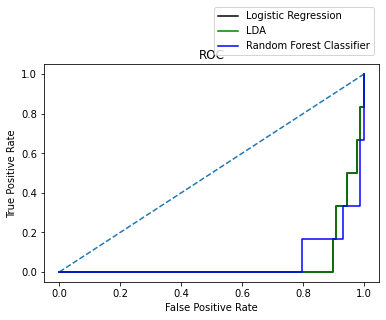

In [88]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr,color='black',label="Logistic Regression")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")
plt.plot(rfcl_test_fpr,rfcl_test_tpr,color='blue',label="Random Forest Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')